In [ ]:
# for this deliverable, regression will be used on the california housing data set to predict median house value for an area. Other data in the data set includes: latitude
# and longitude of the area, the median age of the housing in the area, the total rooms and total bedrooms of the housing in the area, the population and the amount of 
# households in the area, and then the median income of the area (in 10s of thousands of dollars).
# since the original data set contains almost 20,000 rows of data, and many different variables, only 15 observations will be taken
# with the predictor variables being median income and population.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('california_housing.csv')

In [4]:
df.drop(columns = 'Unnamed: 0', axis = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
19995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
19996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
19997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
19998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [5]:
median_house_value = [344700,176500,270500,330000,81700,67000,67000,166900,194400,164200,125000,58300,252600,231200,222500]
original_median_income = [6.6085,3.599,5.7934,6.1359,2.9375,1.6635,1.6641,3.225,3.6696,2.3333,2.2054,2.4167,4.69,4.5625,5.7121]
population = [1537,809,1484,49,850,663,604,1341,1446,2830,1288,564,535,1935,1217]
# observed values are given to target variable and predictors

In [6]:
median_income = [10000*i for i in original_median_income] # puts median income in actual amounts
mini_data = pd.DataFrame({'median_house_value':median_house_value, 'median_income':median_income, 'population':population})
mini_data.head()

,median_house_value,median_income,population
0,344700,66085.0,1537
1,176500,35990.0,809
2,270500,57934.0,1484
3,330000,61359.0,49
4,81700,29375.0,850


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
features = ['median_income','population']
x = mini_data[features]
y = mini_data['median_house_value']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .4, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
miniLR = LinearRegression()
miniLR.fit(x_train, y_train)

LinearRegression()

In [12]:
print("R squared value is: ", miniLR.score(x_train, y_train))
# R^2 is .94, which means the variables should correlate well with the data

R squared value is:  0.9484083738750828


In [13]:
print('The intercept (b_0) is {}'.format(miniLR.intercept_))
print('The coefficient (b_1) is {}'.format(miniLR.coef_[0]))
print('The coefficient (b_2) is {}'.format(miniLR.coef_[1]))

The intercept (b_0) is -30062.43867610625
The coefficient (b_1) is 5.645389980342709
The coefficient (b_2) is 1.1686544175502982


In [14]:
price_pred = miniLR.predict(x_test)
price_pred 
# using the test data, which is 40% of the sample, 6 price predictions are given

array([174060.58814023,  64588.36325498, 178790.66633033, 104968.7377369 ,
       293830.13481721, 136764.24825138])

In [15]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, price_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, price_pred))
print('Sqrt of MSE: ', np.sqrt(metrics.mean_squared_error(y_test, price_pred)))
# based on mean absolute error, the values predicted are not extremely accurate, but considering the wide range of prices homes can fall under
# , the model could definitely be considered acceptable in some circumstances

Mean Absolute Error:  34347.67126769313
Mean Squared Error:  1980636669.5722873
Sqrt of MSE:  44504.344389871505


In [17]:
# function to find mean absolute percentage error
def MAPE (y,pred):
  List1 = list(y)
  List2 = list(pred)
  error = []
  for i in range(len(List1)):
    err = np.abs(List1[i]-List2[i])
    error.append(err/List1[i])
  return np.mean(error)

In [18]:
print('MAPE: ', MAPE(y_test, price_pred)*100, '%')
# the MAPE of 25% means that the average difference between the predicted price and actual price is 25%
# this isn't ideal, but to find a ballpark range of the price of a house, it could work for some.

MAPE:  24.756712340473673 %


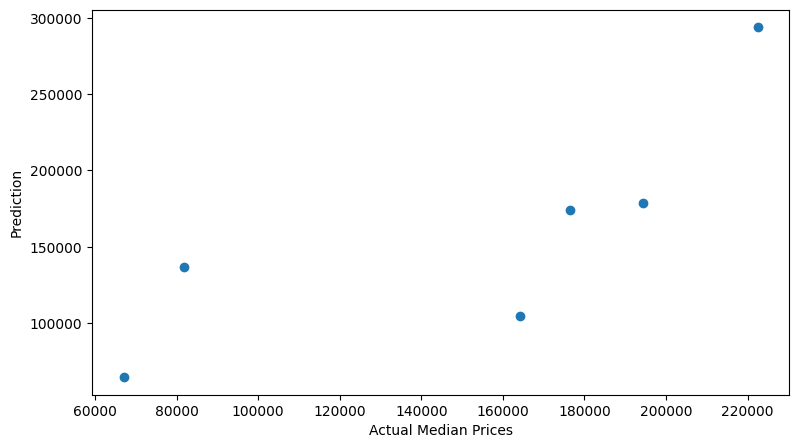

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 5))
plt.scatter(x= y_test, y = price_pred)
plt.xlabel('Actual Median Prices')
plt.ylabel('Prediction')
plt.show()

In [ ]:
# Summary:
# from the graph, we can see that there is a even balance between predicted prices close to the actual prices,
# predicted prices somewhat near to the actual prices, and predicted prices significantly far from actual prices

# from the other metrics though, it can be seen that the predictions from the regressions could definitely be closer and more accurate
# but they could be acceptable depending on how much error is acceptable.